In [1]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from analysis import * 

In [8]:
## Epic units package

from astropy import units
from astropy import constants as c

c.G.to('km3 / (M_sun s2)')

<Quantity 1.3271244e+11 km3 / (s2 solMass)>

In [3]:
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [4]:
G = c.G.to('km^3 / (M_sun s^2)')

hubble =  0.6776942783267969
# a = float(s.properties['a'])

In [16]:
(discharged.v)/(np.sqrt(2 * c.G.to('km^3 / (M_sun s^2)') * discharged.sat_Mvir / discharged.r))

190920    8.901671e-10
246974    2.539664e-09
132506    1.262582e-09
161854    4.522019e-10
190924    1.958880e-09
              ...     
39323     1.312192e-09
21846     2.126764e-10
13105     3.917179e-10
34964     2.182532e-09
17484     1.736459e-10
Length: 241104, dtype: float64

In [5]:
# compiling escape velocities for each particle's respective satellite.
pre_vesc = np.sqrt(2 * G * predischarged.sat_Mvir / predischarged.r)
all_vesc = np.sqrt(2 * G * discharged.sat_Mvir / discharged.r)
acc_vesc = np.sqrt(2 * G * accreted.sat_Mvir / accreted.r)
hpre_vesc = np.sqrt(2 * G * preheated.sat_Mvir / preheated.r)
hot_vesc = np.sqrt(2 * G * heated.sat_Mvir / heated.r)


# creating callable key effective velocity.
predischarged['v_per_Vesc'] = predischarged.v / pre_vesc

discharged['v_per_Vesc'] = discharged.v / all_vesc

accreted['v_per_Vesc'] = accreted.v / acc_vesc

preheated['v_per_Vesc'] = preheated.v / hpre_vesc

heated['v_per_Vesc'] = heated.v / hot_vesc

In [9]:
discharged.sat_Mvir

190920    9.786175e+09
246974    9.585598e+09
132506    1.066215e+10
161854    1.002284e+10
190924    9.786175e+09
              ...     
39323     2.031549e+09
21846     3.091517e+09
13105     3.202585e+09
34964     2.054089e+09
17484     3.232682e+09
Name: sat_Mvir, Length: 241104, dtype: float64

In [10]:
discharged.sat_Mgas

190920    17270300.0
246974    10642800.0
132506    27038200.0
161854    19855200.0
190924    17270300.0
             ...    
39323      7805360.0
21846     41539900.0
13105     56220400.0
34964     11982000.0
17484     59830800.0
Name: sat_Mgas, Length: 241104, dtype: float64

In [6]:
discharged.v_per_Vesc.max()

2.1624436025578706e-07

In [7]:
discharged.v, all_vesc

(190920    17.529505
 246974    42.808649
 132506    23.772241
 161854    25.309921
 190924    29.241632
             ...    
 39323     20.455569
 21846      6.731386
 13105     10.263718
 34964     16.204014
 17484      5.549001
 Name: v, Length: 241104, dtype: float64,
 190920    1.969238e+10
 246974    1.685603e+10
 132506    1.882828e+10
 161854    5.597040e+10
 190924    1.492773e+10
               ...     
 39323     1.558886e+10
 21846     3.165084e+10
 13105     2.620181e+10
 34964     7.424412e+09
 17484     3.195584e+10
 Length: 241104, dtype: float64)

In [9]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

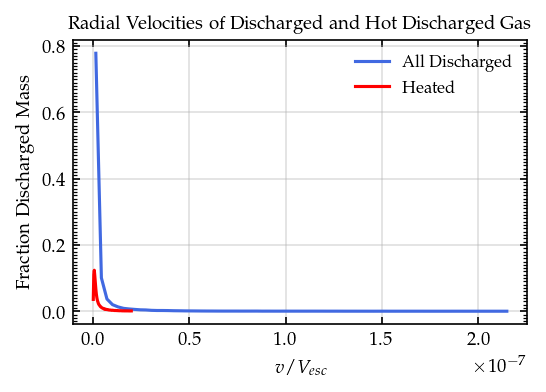

In [61]:
##### plotting all discharged vs. SNe-heated discharged gas #####
bins = 75
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# all discharged.
y1, x = np.histogram(discharged.v_per_Vesc, bins=bins, weights=discharged.weight)#, range=(0, 1))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='royalblue')

# sne-heated discharge.
y1, x = np.histogram(heated.v_per_Vesc, bins=bins, weights=heated.weight, range=(0, 2.0e-8))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Discharged Gas', fontsize='medium')
ax.set_xlabel(r'$v/V_{esc}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1e10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.show()

In [62]:
# compiling virial velocities for each particle's respective satellite.
pre_vvir = np.sqrt(G * predischarged.sat_Mvir / predischarged.satRvir)
all_vvir = np.sqrt(G * discharged.sat_Mvir / discharged.satRvir)
acc_vvir = np.sqrt(G * accreted.sat_Mvir / accreted.satRvir)
hpre_vvir = np.sqrt(G * preheated.sat_Mvir / preheated.satRvir)
hot_vvir = np.sqrt(G * heated.sat_Mvir / heated.satRvir)


# creating callable key for effective velocity.
predischarged['v_per_Vvir'] = predischarged.v / pre_vvir

discharged['v_per_Vvir'] = discharged.v / all_vvir

accreted['v_per_Vvir'] = accreted.v / acc_vvir

preheated['v_per_Vvir'] = preheated.v / hpre_vvir

heated['v_per_Vvir'] = heated.v / hot_vvir

In [69]:
discharged.v_per_Vvir.max()

1.679721956080866e-07

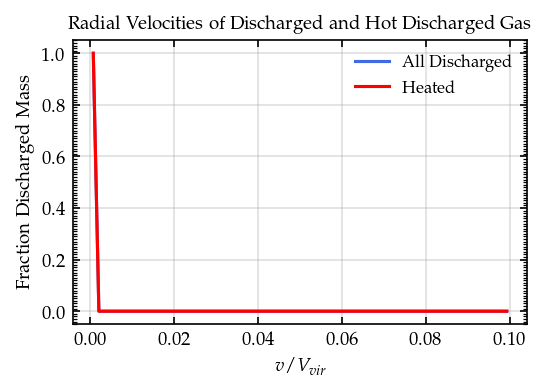

In [67]:
##### plotting all discharged vs. SNe-heated discharged gas #####
bins = 75
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# all discharged.
y1, x = np.histogram(discharged.v_per_Vvir, bins=bins, weights=discharged.weight, range=(0,0.1))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='royalblue')

# sne-heated discharge.
y1, x = np.histogram(heated.v_per_Vvir, bins=bins, weights=heated.weight, range=(0, 0.1))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Discharged Gas', fontsize='medium')
ax.set_xlabel(r'$v/V_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1e10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()